In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

C:\Users\ricca\AppData\Local\Temp\ipykernel_1160\613319418.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
file = r'C:\Users\ricca\Desktop\MAGISTRALE\QTLab2324\IR_SING_PHOT\API\RESONANCE\pic_nic_perfetto.txt'

In [3]:
data = pd.read_csv(file, sep='\t')

In [4]:
f = np.array(data['F'])
i = np.array(data['I'])
q = np.array(data['Q'])
c = q+1j*i
s = np.abs(c)
p = np.unwrap(np.angle(c))

In [5]:
len_fit = int(np.floor(len(i)/10))
i_amp = np.polyfit(f[:len_fit], i[:len_fit], 2)
q_amp = np.polyfit(f[:len_fit], q[:len_fit], 2)
I_rms = np.sqrt(np.mean((np.polyval(i_amp, f[:len_fit])-i[:len_fit])**2))   
Q_rms = np.sqrt(np.mean((np.polyval(q_amp, f[:len_fit])-q[:len_fit])**2))   

In [6]:
def filter_signal_moving_average(y, window_size):
    y_smooth = np.convolve(y, np.ones(window_size)/window_size, mode='same')
    return y_smooth

In [7]:
i_smooth = filter_signal_moving_average(i, 11)
q_smooth = filter_signal_moving_average(q, 11)

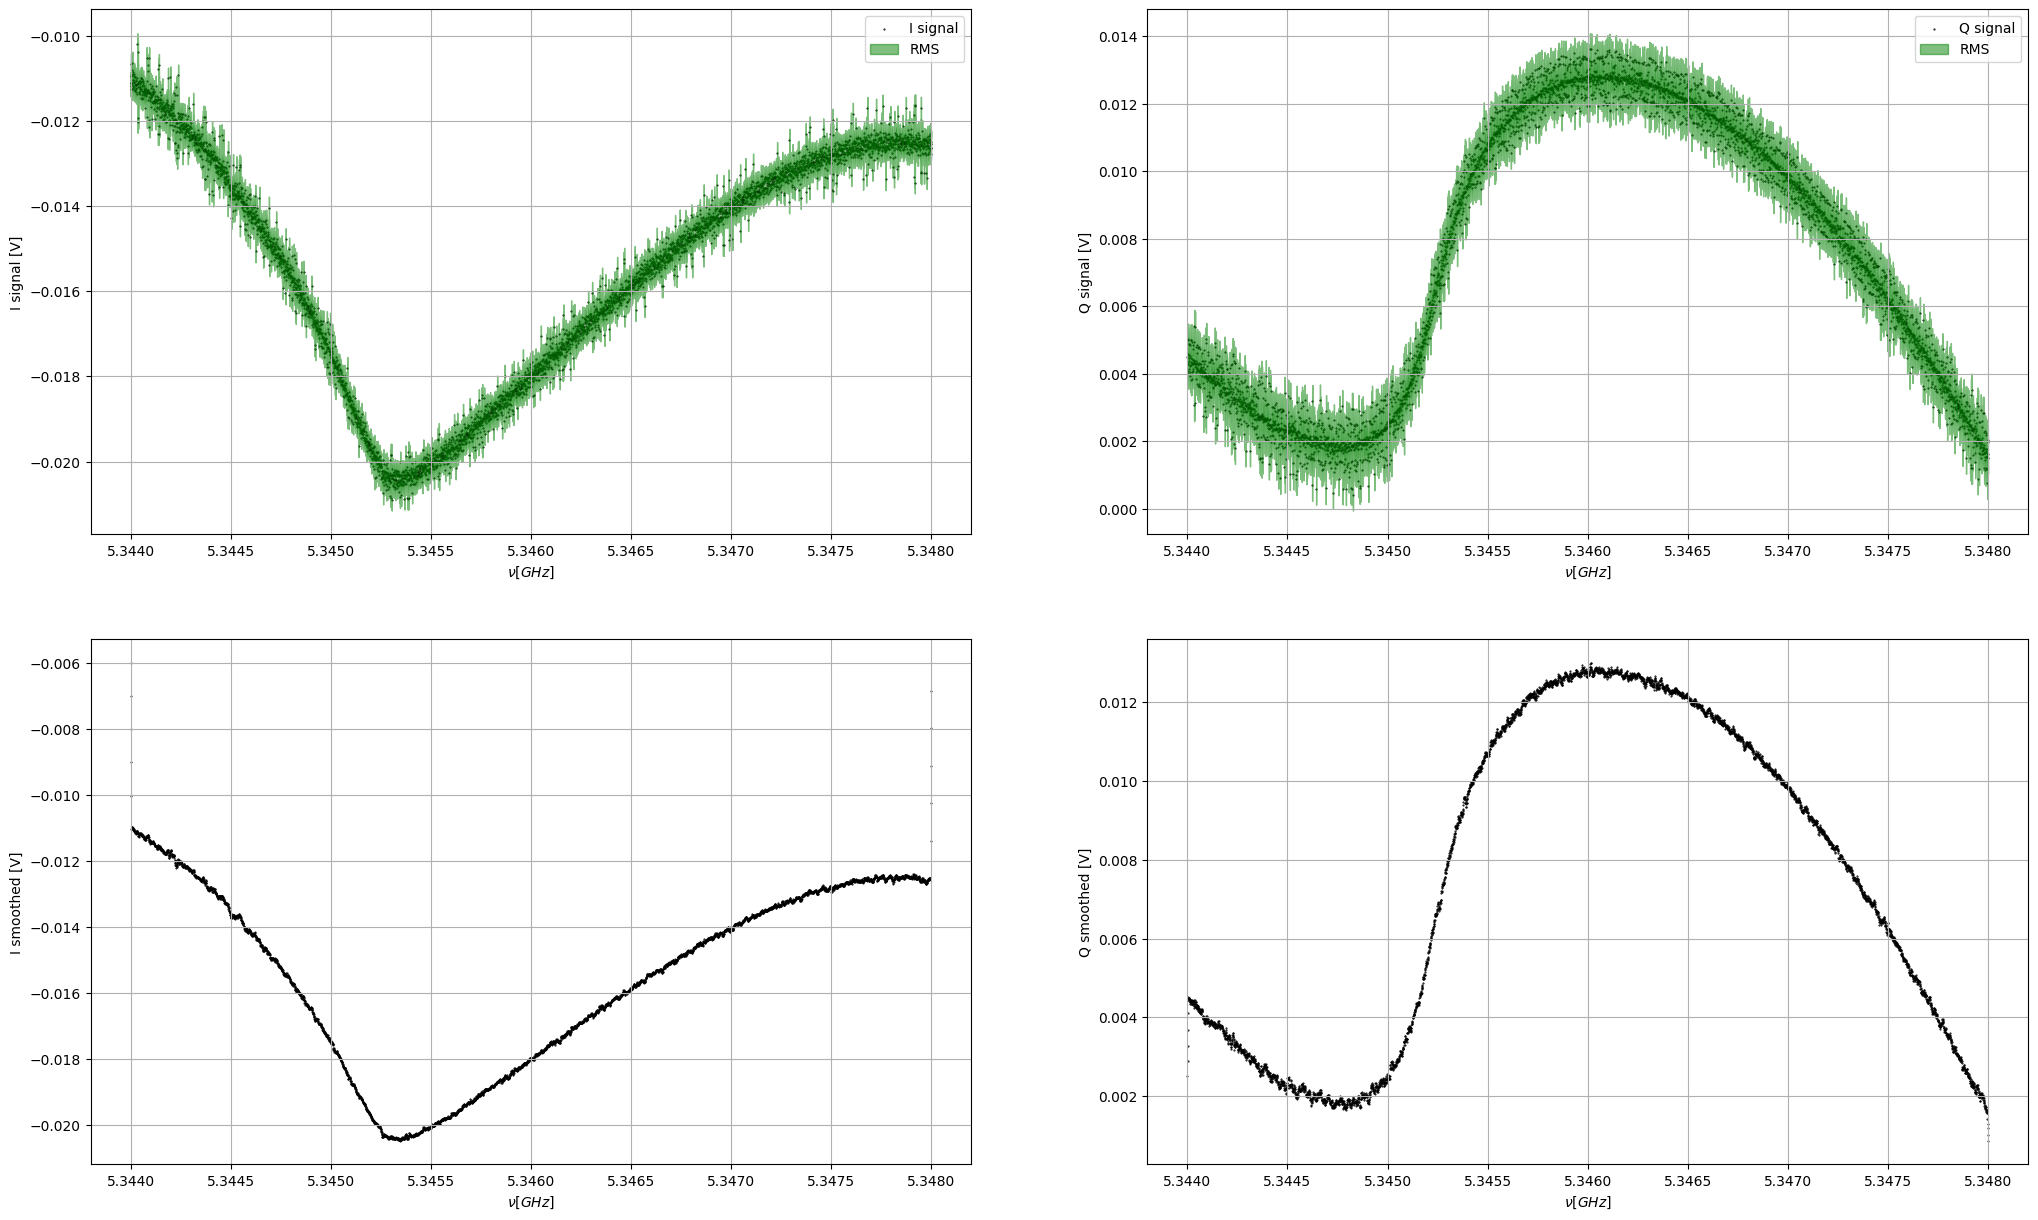

In [9]:
fig, axs = plt.subplots(2,2,figsize=(25,15))
axs[0][0].scatter(f,i,label='I signal', marker='.',color='black',s=1)
axs[0][1].scatter(f,q,label='Q signal', marker='.',color='black',s=1)
axs[0][0].fill_between(f, i+I_rms, i-I_rms, alpha=0.5, color='green',label='RMS')
axs[0][1].fill_between(f, q+Q_rms, q-Q_rms, alpha=0.5, color='green',label='RMS')
axs[0][0].set_xlabel(r'$\nu [GHz]$')
axs[0][0].set_ylabel(r'I signal [V]')
axs[0][1].set_xlabel(r'$\nu [GHz]$')
axs[0][1].set_ylabel(r'Q signal [V]')
axs[0][0].grid()
axs[0][1].grid()
axs[0][0].legend()
axs[0][1].legend()

axs[1][0].scatter(f,i_smooth, marker='.',color='black',s=1)
axs[1][1].scatter(f,q_smooth, marker='.',color='black',s=1)
axs[1][0].set_xlabel(r'$\nu [GHz]$')
axs[1][0].set_ylabel(r'I smoothed [V]')
axs[1][1].set_xlabel(r'$\nu [GHz]$')
axs[1][1].set_ylabel(r'Q smoothed [V]')
axs[1][0].grid()
axs[1][1].grid()
axs[0][0].legend()
axs[0][1].legend()

In [11]:
def compute_derivative_savgol(y, dx, window_length, polyorder):
    y_deriv = savgol_filter(y, window_length, polyorder, deriv=1, delta=dx)
    return y_deriv

In [12]:
dx = 1e-9
i_prime = compute_derivative_savgol(i_smooth, dx, 291, 3)
q_prime = compute_derivative_savgol(q_smooth, dx, 291, 3)
i_second = compute_derivative_savgol(i_prime, dx, 291, 3)
q_second = compute_derivative_savgol(q_prime, dx, 291, 3)

In [13]:
idx = [i for i in range(len(i)) if f[i]>5.345 and f[i]<5.3455]
f = f[idx]
s = s[idx]
p = p[idx]
i_prime = i_prime[idx]
q_prime = q_prime[idx]
i_second = i_second[idx]
q_second = q_second[idx]

In [14]:
i_peaks, i_props = find_peaks(i_prime,i_prime.mean())
q_peaks, q_props = find_peaks(q_prime,q_prime.mean())

In [15]:
fmax_i = f[i_peaks[0]]
fmax_q = f[q_peaks[0]]
imax_i = i_prime[i_peaks[0]]
qmax_i = q_prime[i_peaks[0]]

imax_q = i_prime[q_peaks[0]]
qmax_q = q_prime[q_peaks[0]]

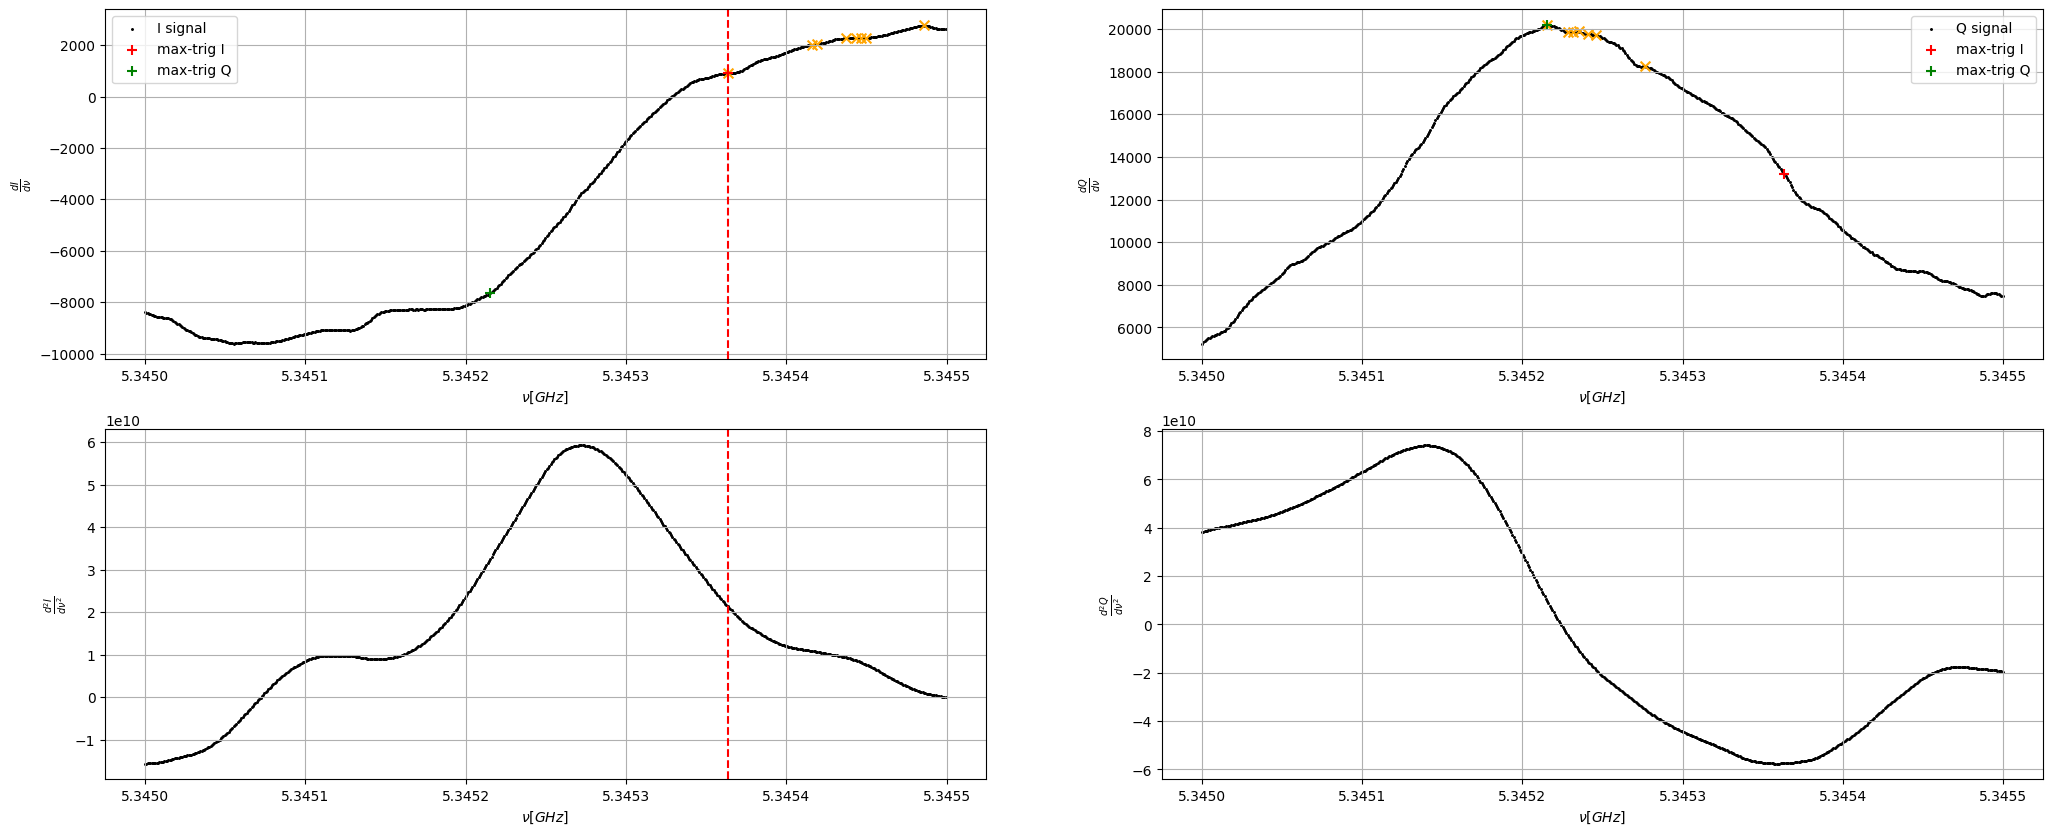

In [17]:
fig, axs = plt.subplots(2,2,figsize=(25,10))
axs[0][0].scatter(f,i_prime,label='I signal', marker='.',color='black',s=5)
axs[0][1].scatter(f,q_prime,label='Q signal', marker='.',color='black',s=5)
axs[0][0].set_xlabel(r'$\nu [GHz]$')
axs[0][0].set_ylabel(r'$\frac{dI}{d\nu}$')
axs[0][1].set_xlabel(r'$\nu [GHz]$')
axs[0][1].set_ylabel(r'$\frac{dQ}{d\nu}$')
axs[0][0].grid()
axs[0][1].grid()
for x,y in zip(f[i_peaks], i_props['peak_heights']):
    axs[0][0].scatter(x,y,marker='x',s=50,color='orange')
for x,y in zip(f[q_peaks], q_props['peak_heights']):
    axs[0][1].scatter(x,y,marker='x',s=50,color='orange')
axs[0][0].scatter(fmax_i,imax_i,marker='+',s=50,color='red',label='max-trig I')
axs[0][1].scatter(fmax_i,qmax_i,marker='+',s=50,color='red', label='max-trig I')
axs[0][0].scatter(fmax_q,imax_q,marker='+',s=50,color='green',label='max-trig Q')
axs[0][1].scatter(fmax_q,qmax_q,marker='+',s=50,color='green', label='max-trig Q')
axs[0][0].legend()
axs[0][1].legend()
axs[0][0].axvline(fmax_i,0,1,linestyle='--',color='red')
axs[1][0].axvline(fmax_i,0,1,linestyle='--',color='red')

axs[1][0].scatter(f,i_second,label='I signal', marker='.',color='black',s=5)
axs[1][1].scatter(f,q_second,label='Q signal', marker='.',color='black',s=5)
#axs[0].scatter(xi,yi,marker='x',s=10,color='red')
#axs[1].scatter(xq,yq,marker='x',s=10,color='red')
axs[1][0].set_xlabel(r'$\nu [GHz]$')
axs[1][0].set_ylabel(r'$\frac{d^{2}I}{d\nu^{2}}$')
axs[1][1].set_xlabel(r'$\nu [GHz]$')
axs[1][1].set_ylabel(r'$\frac{d^{2}Q}{d\nu^{2}}$')
axs[1][0].grid()
axs[1][1].grid()

In [16]:
f2 = np.array(data['F'])
i2 = np.array(data['I'])
q2 = np.array(data['Q'])
c2 = q+1j*i
s2 = np.abs(c)
p2 = np.unwrap(np.angle(c))

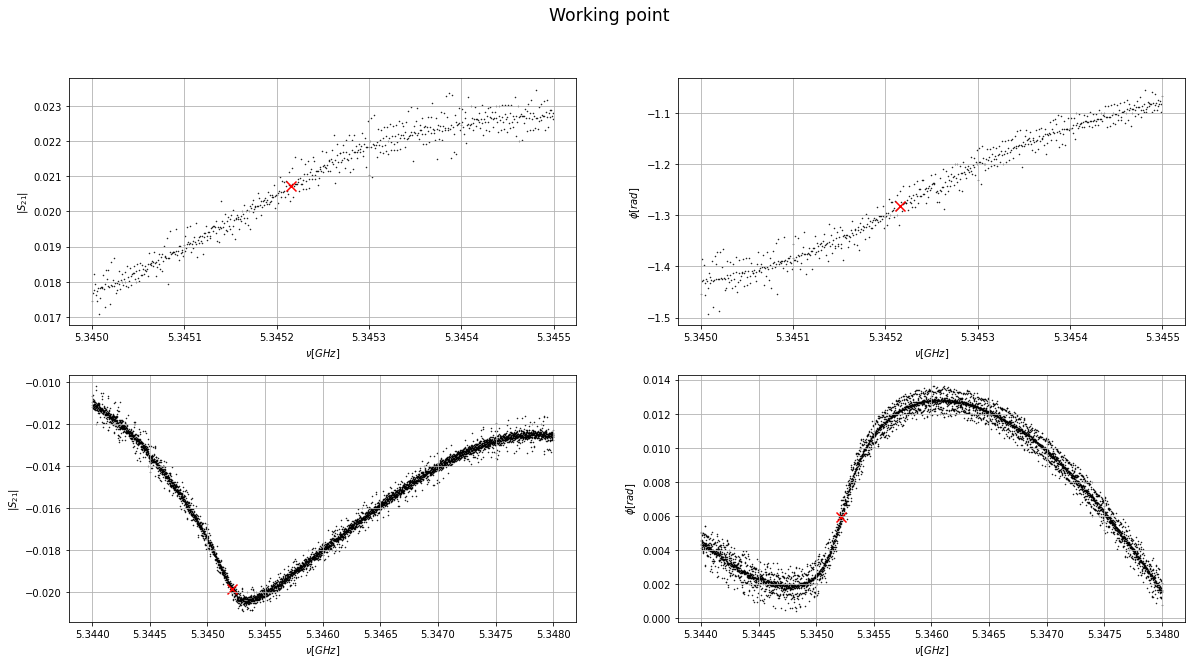

In [17]:
fig, axs = plt.subplots(2,2,figsize=(20,10))
fig.suptitle('Working point', fontsize='xx-large')
axs[0][0].scatter(f, s, marker='.',color='black',s=1)
axs[0][0].scatter(fmax_q,s[q_peaks[0]], marker='x',color='red',s=100)
axs[0][1].scatter(f, p, marker='.',color='black',s=1)
axs[0][1].scatter(fmax_q,p[q_peaks[0]], marker='x',color='red',s=100)
axs[0][0].set_xlabel(r'$\nu [GHz]$')
axs[0][0].set_ylabel(r'$|S_{21}|$')
axs[0][1].set_xlabel(r'$\nu [GHz]$')
axs[0][1].set_ylabel(r'$\phi [rad]$')
axs[0][0].grid()
axs[0][1].grid()

axs[1][0].scatter(f2, i2, marker='.',color='black',s=1)
axs[1][0].scatter(f2[q_peaks[0]+idx[0]],i2[q_peaks[0]+idx[0]], marker='x',color='red',s=100)
axs[1][1].scatter(f2, q2, marker='.',color='black',s=1)
axs[1][1].scatter(f2[q_peaks[0]+idx[0]],q2[q_peaks[0]+idx[0]], marker='x',color='red',s=100)
axs[1][0].set_xlabel(r'$\nu [GHz]$')
axs[1][0].set_ylabel(r'$|S_{21}|$')
axs[1][1].set_xlabel(r'$\nu [GHz]$')
axs[1][1].set_ylabel(r'$\phi [rad]$')
axs[1][0].grid()
axs[1][1].grid()

In [18]:
print('frequency: ', f2[q_peaks[0]+idx[0]])

frequency:  5.345215443088618
